In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


In [6]:
data=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/train.csv')
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
data.isna().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [7]:
data['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [8]:
len(data['store_nbr'].unique())

54

In [9]:
len(data['family'].unique())

33

In [10]:
test=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/test.csv')

test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [11]:
submission=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv')
submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [12]:
!pip install auto_ts

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.6/109.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.1 MB/s eta 0:00:00
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=ea5874b2550e1f0163a70259dd85d74c2335fa2f3e60a522720820ff50ca9edd
  Stored in directory: /root/.cache/pip/wheels/a9/8a/bd/81082387151853ab8b6b3ef33426e98f5cbfebc3c397a9d4d0
Successfully built GPUtil
  Attempting uninstall: jupyter-lsp
    Found existing installation: jupyter-lsp 1.5.1
    Uninstalling jupyter-lsp-1.5.1:
      Successfully uninstalled jupyter-lsp-1.5.1


In [13]:
from auto_ts import auto_timeseries


Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [14]:
test.shape[0]/(54*33)

16.0

In [15]:
len(test['family'].unique())


33

In [20]:
data['date'] = pd.to_datetime(data['date'])


In [17]:
data

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [18]:
# data= data.set_index('date')


### Vizualization and Seasonal Decomposition


In [21]:
df = data[(data['family'] == 'AUTOMOTIVE') & (data['store_nbr'] == 1)]

In [ ]:

df['sales'].plot()
plt.xlabel(' Date')
plt.ylabel('Sales')
plt.title('Total sale over years')
plt.show()

In [ ]:
#create new DataFrame
monthly_OS = pd.DataFrame()

monthly_OS['sales'] = df['sales'].resample('MS').mean()
plt.plot(monthly_OS.index, monthly_OS.sales, linewidth=3)

In [ ]:
from dateutil.parser import parse
import itertools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(monthly_OS['sales'], model='additive')
fig = decomposition.plot()
plt.show()

In [2]:
!pip install pmdarima
import pmdarima

from pmdarima import auto_arima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.6 MB/s eta 0:00:0000:0100:01


<Axes: xlabel='date'>

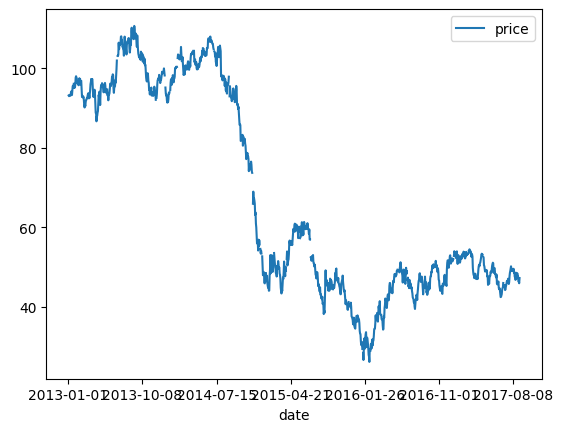

In [3]:
df_oil=pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
df_oil\
  .set_index('date')\
  .rename(columns={'dcoilwtico': 'price'})\
  .plot()

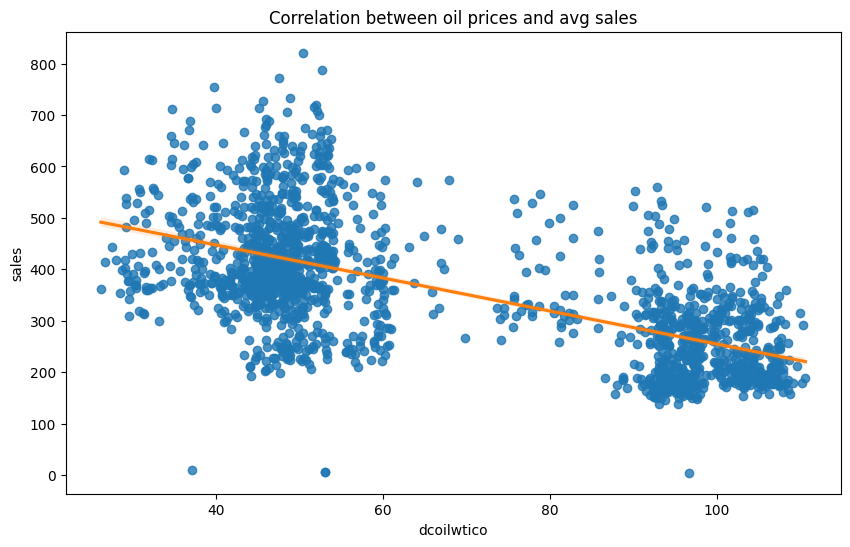

In [7]:
sales_oil = pd.DataFrame(data.groupby('date')['sales'].mean()).reset_index()
sales_oil = sales_oil.merge(df_oil, on='date', how='left')
sales_oil['dcoilwtico'] = sales_oil['dcoilwtico'].interpolate()
plt.figure(figsize=(10, 6))
sns.regplot(x="dcoilwtico", y="sales", data=sales_oil,
            line_kws={"color": "C1"});
plt.title('Correlation between oil prices and avg sales');

In [8]:
df_holiday_events = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv',parse_dates =['date'])
df_holiday_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


TypeError: 'value' must be an instance of str or bytes, not a pandas._libs.tslibs.timestamps.Timestamp

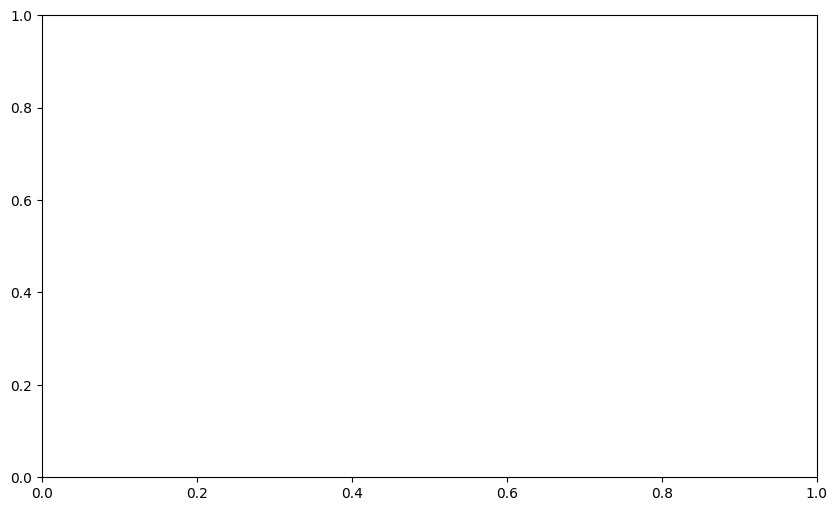

In [16]:

t = data.groupby(['date'], as_index=False)['sales'].mean()
t = pd.concat([t,df_holiday_events])
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
      data=t,
      x='date',
      y='sales',
      size='sales',
      legend=True,
      sizes=(20, 500),
      hue='type'
  )
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Sales in different type of holiday events');

In [3]:
!pip install tqdm


### ARIMA

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from auto_ts import auto_timeseries
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from tqdm import tqdm  # Import tqdm for the progress bar

# Initialize an empty dictionary to store the forecast for each store_nbr and family
forecast_dict = {}
errors_rmsle = []
errors_rmse = []
errors_mae = []
errors_mape = []
city_model = {}

submission_id = 1

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    # Ensure there are no negative values and avoid division by zero
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to calculate MAPE
def mape(y_true, y_pred):
    if np.mean(np.abs((y_true - y_pred) / y_true)) ==np.inf: return 0
    else: return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Total combinations of families and stores for tqdm progress bar
total_combinations = len(data['family'].unique()) * len(data['store_nbr'].unique())

# Use tqdm to add a progress bar around the loop
for family in data['family'].unique():
    for store in data['store_nbr'].unique():
        df = data[(data['family'] == family) & (data['store_nbr'] == store)]

        # Train data from 2013-01-01 to 2017-08-01
        train = df[(df['date'] > '2013-01-01') & (df['date'] <= '2017-08-01')]

        # Test data from 2017-08-01 to 2017-08-15
        test = df[(df['date'] >= '2017-08-01') & (df['date'] <= '2017-08-15')]

        # Fit ARIMA model
        model = ARIMA(train['sales'].values, order=(5, 1, 0))
        city_model[(family, store)] = model.fit()

        # Future time steps for prediction
        future = pd.DataFrame({"date": pd.date_range('2017-08-15', periods=15)})

        # Forecasting next 15 days
        forecast = city_model[(family, store)].forecast(steps=15)
        forecast_dict[(family, store)] = forecast

        # Calculating RMSLE, RMSE, MAE, and MAPE for the test period
        try:
            rmsle_value = rmsle(test['sales'].values, forecast[:len(test)])
            rmse_value = rmse(test['sales'].values, forecast[:len(test)])
            mae_value = mean_absolute_error(test['sales'].values, forecast[:len(test)])
            mape_value = mape(test['sales'].values, forecast[:len(test)])

            # Append each error value for averaging later
            errors_rmsle.append(rmsle_value)
            errors_rmse.append(rmse_value)
            errors_mae.append(mae_value)
            errors_mape.append(mape_value)
        except Exception as e:
            print(f"Error calculating metrics for {family}, store {store}: {e}")

# Calculating the average error metrics across all family-store pairs
average_rmsle = np.mean(errors_rmsle)
average_rmse = np.mean(errors_rmse)
average_mae = np.mean(errors_mae)
average_mape = np.mean(errors_mape)

print(f"Average RMSLE: {average_rmsle}")
print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")
print(f"Average MAPE: {average_mape}%")

# Now forecast_dict contains the forecast for each family and store, and the average error metrics are calculated


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from tqdm import tqdm

# Initialize an empty dictionary to store the forecast for each store_nbr and family
forecast_dict = {}
errors_rmsle = []
errors_rmse = []
errors_mae = []
errors_mape = []

submission_id = 1

# Function to calculate RMSLE
def rmsle(y_true, y_pred):
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Function to calculate MAPE
def mape(y_true, y_pred):
    if np.mean(np.abs((y_true - y_pred) / y_true)) == np.inf:
        return 0
    else:
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to reshape data for LSTM
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
    return np.array(sequences)

# LSTM model definition
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))  # Output layer for the forecast
    model.compile(optimizer=Adam(), loss='mse')
    return model

# Scaling function
scaler = MinMaxScaler()

# Use tqdm to add a progress bar around the loop
for family in data['family'].unique():
    for store in data['store_nbr'].unique():
        df = data[(data['family'] == family) & (data['store_nbr'] == store)]

        # Train data from 2013-01-01 to 2017-08-01
        train = df[(df['date'] > '2013-01-01') & (df['date'] <= '2017-08-01')]

        # Test data from 2017-08-01 to 2017-08-15
        test = df[(df['date'] >= '2017-08-01') & (df['date'] <= '2017-08-15')]

        # Scale the sales data between 0 and 1
        train_sales = scaler.fit_transform(train['sales'].values.reshape(-1, 1))

        # Sequence length for LSTM (e.g., using 30 days to predict the next)
        sequence_length = 30

        # Create sequences from the training data
        X_train = create_sequences(train_sales, sequence_length)
        y_train = train_sales[sequence_length:]

        # Reshape X_train for LSTM input (samples, time steps, features)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

        # Build and train the LSTM model
        lstm_model = build_lstm_model((X_train.shape[1], X_train.shape[2]))
        lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

        # Forecasting the next 15 days
        last_sequence = train_sales[-sequence_length:].reshape(1, sequence_length, 1)
        forecast = []

        for _ in range(15):
            next_step = lstm_model.predict(last_sequence)
            forecast.append(next_step[0, 0])

            # Reshape next_step to be 3D (1, 1, 1) to match the shape of last_sequence
            next_step = np.reshape(next_step, (1, 1, 1))

            # Append next_step to the last_sequence (drop the first time step and add next_step at the end)
            last_sequence = np.append(last_sequence[:, 1:, :], next_step, axis=1)
        forecast = np.array(forecast).reshape(-1, 1)
        forecast = scaler.inverse_transform(forecast)  # Inverse transform to get original scale
        forecast_dict[(family, store)] = forecast.flatten()

        # Calculating RMSLE, RMSE, MAE, and MAPE for the test period
        try:
            rmsle_value = rmsle(test['sales'].values, forecast[:len(test)].flatten())
            rmse_value = rmse(test['sales'].values, forecast[:len(test)].flatten())
            mae_value = mean_absolute_error(test['sales'].values, forecast[:len(test)].flatten())
            mape_value = mape(test['sales'].values, forecast[:len(test)].flatten())
            print(rmsle_value)

            # Append each error value for averaging later
            errors_rmsle.append(rmsle_value)
            errors_rmse.append(rmse_value)
            errors_mae.append(mae_value)
            errors_mape.append(mape_value)
        except Exception as e:
            print(f"Error calculating metrics for {family}, store {store}: {e}")

# Calculating the average error metrics across all family-store pairs
average_rmsle = np.mean(errors_rmsle)
average_rmse = np.mean(errors_rmse)
average_mae = np.mean(errors_mae)
average_mape = np.mean(errors_mape)

print(f"Average RMSLE: {average_rmsle}")
print(f"Average RMSE: {average_rmse}")
print(f"Average MAE: {average_mae}")
print(f"Average MAPE: {average_mape}%")

# Now forecast_dict contains the forecast for each family and store, and the average error metrics are calculated


In [24]:
from auto_ts import auto_timeseries
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Initialize an empty dictionary to store the forecast for each store_nbr and family
forecast_dict = {}

errors=[]
city_model={}
submission_id=1
# final=pd.DataFrame({"submission_ID":[],"avg_temp_c":[]})

for family in data['family'].unique():
    for store in data['store_nbr'].unique():
#         print(store)
        df = data[(data['family'] == family) & (data['store_nbr'] == store)]

        # Train data from 2013-01-01 to 2017-08-01
        train = df[(df['date'] > '2013-01-01') & (df['date'] <= '2017-08-15')]
#         print(train)

        # Test data from 2017-08-01 to 2017-08-15
        test = df[(df['date'] >= '2017-08-01') & (df['date'] <= '2017-08-15')]

        # Fit ARIMA model
        model = ARIMA(train['sales'].values, order=(5, 1, 0))
        city_model[(family, store)] = model.fit()

        # Future time steps for prediction
        future = pd.DataFrame({"date": pd.date_range('2017-08-16', periods=16)})

        # Forecasting next 15 days
        forecast = city_model[(family, store)].forecast(steps=16)

        # Storing forecast for each (family, store) in forecast_dict
        forecast_dict[(family, store)] = forecast

        # Plotting
        train_ = df[(df['date'] > '2017-07-01') & (df['date'] <= '2017-08-15')]
#         plt.figure(figsize=(12, 6))
#         plt.plot(train_['date'], train_['sales'], label='Actual')
#         plt.plot(future['date'], forecast, label='Predicted')
#         plt.xlabel('Date')
#         plt.ylabel('Sales')
#         plt.title(f'ARIMA Model - {family} (Store {store})')
#         plt.legend()
#         plt.show()

        # Creating submission dataframe
#         new_df = pd.DataFrame({
#             "id": [item for item in range(submission_id, submission_id + 15)],
#             "avg_temp_c": forecast
#         })
#         submission_id += 15  # Adjusting submission_id for the next set
#         final = pd.concat([final, new_df], axis=0)

#         print(final.to_string())

# Now `forecast_dict` contains the forecast for each family and store


In [50]:
!pip install tqdm


In [52]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# # Initialize an empty dictionary to store the forecast for each store_nbr and family
# forecast_dict = {}
# errors = []
# city_model = {}
# submission_id = 1
# final = pd.DataFrame({"submission_ID": [], "avg_temp_c": []})

# # Total iterations for progress bar
# total_iterations = len(data['family'].unique()) * len(data['store_nbr'].unique())

# # Initialize the progress bar
# with tqdm(total=total_iterations, desc="SARIMA Model Progress") as pbar:
#     for family in data['family'].unique():
#         for store in data['store_nbr'].unique():
#             df = data[(data['family'] == family) & (data['store_nbr'] == store)]

#             # Train data from 2013-01-01 to 2017-08-01
#             train = df[(df['date'] > '2013-01-01') & (df['date'] <= '2017-08-15')]

#             # Test data from 2017-08-01 to 2017-08-15
#             test = df[(df['date'] >= '2017-08-01') & (df['date'] <= '2017-08-15')]

#             # Define SARIMA model
#             sarima_order = (5, 1, 0)  # ARIMA parameters
#             seasonal_order = (1, 1, 1, 7)  # Seasonal parameters

#             model = SARIMAX(train['sales'].values, 
#                             order=sarima_order,
#                             seasonal_order=seasonal_order,
#                             enforce_stationarity=False,
#                             enforce_invertibility=False)
            
#             m = model.fit(disp=False)

#             # Future time steps for prediction
#             future = pd.DataFrame({"date": pd.date_range('2017-08-16', periods=16)})

#             # Forecasting next 15 days
#             forecast = m.forecast(steps=16)

#             # Storing forecast for each (family, store) in forecast_dict
#             forecast_dict[(family, store)] = forecast

#             # Plotting
# #             train_ = df[(df['date'] > '2017-07-01') & (df['date'] <= '2017-08-15')]
# #             plt.figure(figsize=(12, 6))
# #             plt.plot(train_['date'], train_['sales'], label='Actual')
# #             plt.plot(future['date'], forecast, label='Predicted')
# #             plt.xlabel('Date')
# #             plt.ylabel('Sales')
# #             plt.title(f'SARIMA Model - {family} (Store {store})')
# #             plt.legend()
# #             plt.show()

#             # Update the progress bar
#             pbar.update(1)

# # Now `forecast_dict` contains the forecast for each family and store


SARIMA Model Progress: 100%|██████████| 1782/1782 [1:28:03<00:00,  2.96s/it]


In [67]:
forecast_dict_=forecast_dict.copy()

In [54]:
len(forecast_dict_[('AUTOMOTIVE', 1)])

16

In [ ]:
# final_submission = pd.DataFrame()

# for (family, store), forecast in forecast_dict.items():
#     # Filter the test dataframe for the corresponding family and store
#     test_df = data[(data['family'] == family) & (data['store_nbr'] == store) & 
#                    (data['date'] >= '2017-08-01') & (data['date'] <= '2017-08-15')]
    
#     # Ensure forecast length matches the test data length (truncate if needed)
#     test_df = test_df.head(len(forecast))
    
#     # Add the forecasted sales from forecast_dict to the test dataframe
#     test_df['sales'] = forecast
    
#     # Append this test dataframe to the final_submission dataframe
#     final_submission = pd.concat([final_submission, test_df[['id', 'sales', 'store_nbr', 'family']]], axis=0)

# # Reset index of the final submission dataframe
# final_submission.reset_index(drop=True, inplace=True)

# # Print or save the final submission dataframe
# print(final_submission.head())

In [68]:
# Initialize the final submission dataframe
final_submission = pd.DataFrame()
count=0
# Loop through each row in the test dataframe
for index, row in test.iterrows():
    # Extract the family and store_nbr from the current row
    family = row['family']
    store = row['store_nbr']
    count=count+1
    print('count',count)
    

    # Get the forecast from forecast_dict based on the family and store_nbr
    if (family, store) in forecast_dict_:
#         print(forecast_dict_[(family, store)])
        
        arr = forecast_dict_[(family, store)]
        print('arra lne',len(arr))
        if len(arr)==0:forecast=forecast
        else:forecast=arr[0]
            
            
        
        forecast_dict_[(family, store)]=arr[1:]
#         print(forecast_dict_[(family, store)])

        

#         # Ensure the forecast is long enough for the required date range (2017-08-16 to 2017-08-31)
#         future_dates = pd.date_range(start='2017-08-16', periods=16, freq='D')
#         forecast_for_submission = forecast[:len(future_dates)]  # Truncate or match forecast to the date range

        # Create a new dataframe for the submission with the corresponding id, store_nbr, family, and forecasted sales
        submission_df = pd.DataFrame({
            'id': [row['id']],  # Use the id from the test dataframe
            
            'sales': forecast  # Use the forecast for the corresponding family and store
        })

        # Append the new submission to the final dataframe
        final_submission = pd.concat([final_submission, submission_df], axis=0)

# Reset index of the final submission dataframe
# final_submission.reset_index(drop=True, inplace=True)

# Print or save the final submission dataframe
print(final_submission.head())


count 1
arra lne 16
count 2
arra lne 16
count 3
arra lne 16
count 4
arra lne 16
count 5
arra lne 16
count 6
arra lne 16
count 7
arra lne 16
count 8
arra lne 16
count 9
arra lne 16
count 10
arra lne 16
count 11
arra lne 16
count 12
arra lne 16
count 13
arra lne 16
count 14
arra lne 16
count 15
arra lne 16
count 16
arra lne 16
count 17
arra lne 16
count 18
arra lne 16
count 19
arra lne 16
count 20
arra lne 16
count 21
arra lne 16
count 22
arra lne 16
count 23
arra lne 16
count 24
arra lne 16
count 25
arra lne 16
count 26
arra lne 16
count 27
arra lne 16
count 28
arra lne 16
count 29
arra lne 16
count 30
arra lne 16
count 31
arra lne 16
count 32
arra lne 16
count 33
arra lne 16
count 34
arra lne 16
count 35
arra lne 16
count 36
arra lne 16
count 37
arra lne 16
count 38
arra lne 16
count 39
arra lne 16
count 40
arra lne 16
count 41
arra lne 16
count 42
arra lne 16
count 43
arra lne 16
count 44
arra lne 16
count 45
arra lne 16
count 46
arra lne 16
count 47
arra lne 16
count 48
arra lne 16
c

In [64]:
test.shape

(28512, 5)

In [69]:
final_submission

,id,sales
0,3000888,3.409732
0,3000889,0.000000
0,3000890,4.820417
0,3000891,1929.036164
0,3000892,0.188179
...,...,...
0,3029395,263.901601
0,3029396,112.166919
0,3029397,1067.735575
0,3029398,158.375131


In [ ]:
submission

In [ ]:
test

In [73]:
final_submission.to_csv('submission_.csv',index=False)